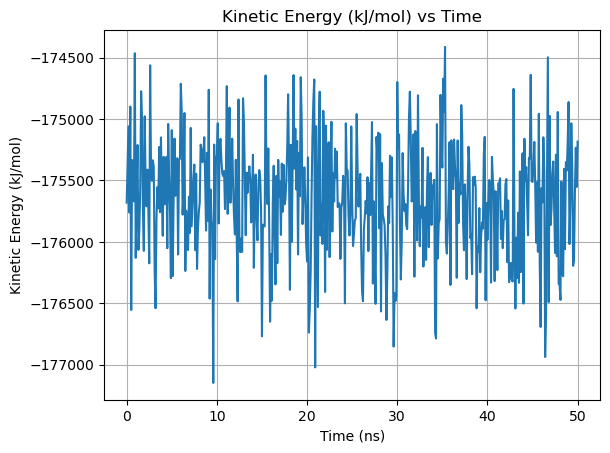

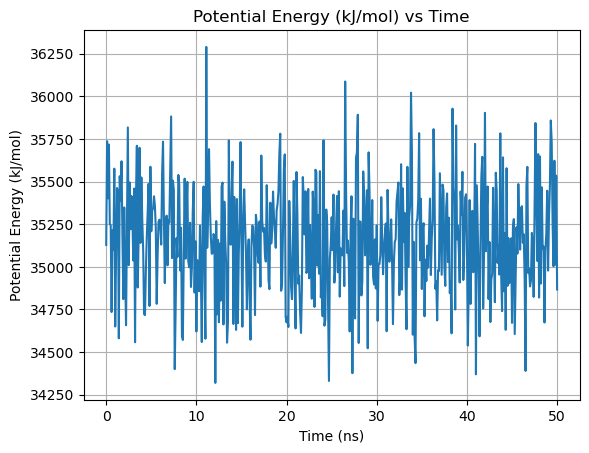

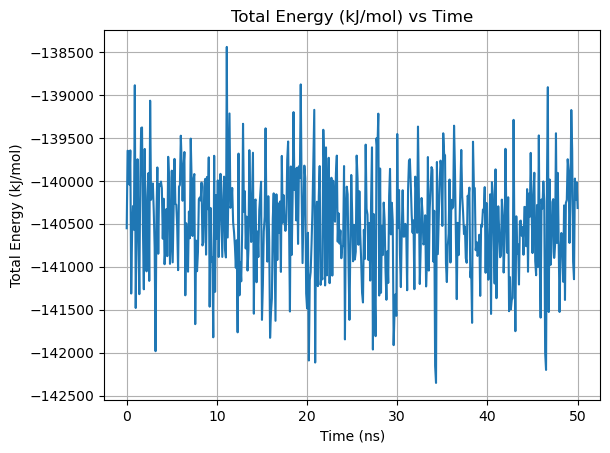

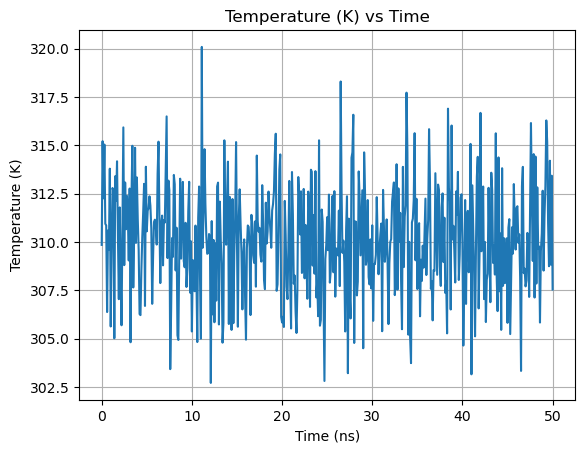

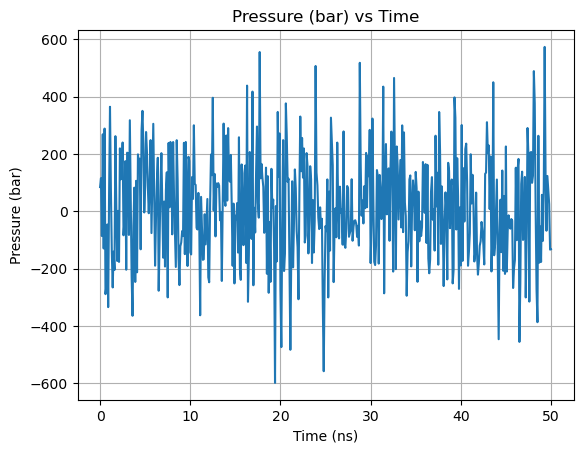

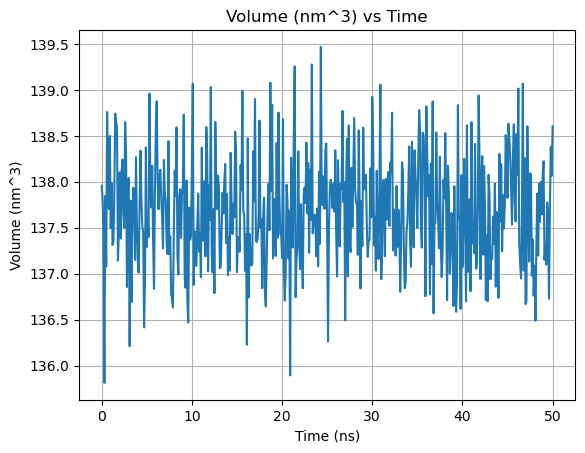

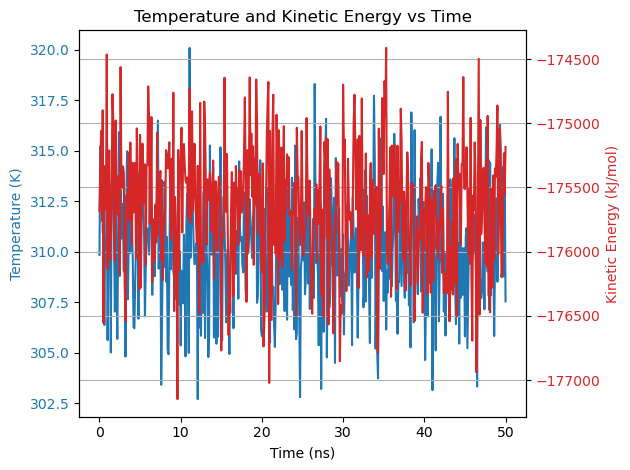

In [1]:
# This Python Script is created by Jialong Wang, entirely or mostly with the help of ChatGPT for CHEM 2671 Class
# Jialong Wang
# Sept. 12, 2024
# CHEM GA 2671, Fall 2024

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the .xvg file
def read_xvg(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Skip comments and extract data
    data = []
    for line in lines:
        if not line.startswith(('#', '@')):
            data.append([float(x) for x in line.split()])

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=[
        'Time (ps)', 
        'Kinetic Energy (kJ/mol)', 
        'Potential Energy (kJ/mol)', 
        'Total Energy (kJ/mol)', 
        'Temperature (K)', 
        'Pressure (bar)', 
        'Volume (nm^3)'
    ])
    
    # Convert time from ps to ns
    df['Time (ns)'] = df['Time (ps)'] / 1000
    return df

# Path to your file
file_path = 'Data/1hz3_T310.run.25000000.energy.xvg'

# Read the data
data = read_xvg(file_path)

# Plot each quantity vs time
def plot_quantities_vs_time(df):
    quantities = [
        'Kinetic Energy (kJ/mol)', 
        'Potential Energy (kJ/mol)', 
        'Total Energy (kJ/mol)', 
        'Temperature (K)', 
        'Pressure (bar)', 
        'Volume (nm^3)'
    ]
    
    # Plot each quantity
    for quantity in quantities:
        plt.figure()
        plt.plot(df['Time (ns)'], df[quantity])
        plt.xlabel('Time (ns)')
        plt.ylabel(quantity)
        plt.title(f'{quantity} vs Time')
        plt.grid(True)
        plt.show()

# Plot kinetic energy and temperature on the same plot with dual axes
def plot_kinetic_energy_temperature(df):
    fig, ax1 = plt.subplots()

    # Plot temperature on the left axis
    ax1.set_xlabel('Time (ns)')
    ax1.set_ylabel('Temperature (K)', color='tab:blue')
    ax1.plot(df['Time (ns)'], df['Temperature (K)'], color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis for kinetic energy
    ax2 = ax1.twinx()
    ax2.set_ylabel('Kinetic Energy (kJ/mol)', color='tab:red')
    ax2.plot(df['Time (ns)'], df['Kinetic Energy (kJ/mol)'], color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Add a title and show the plot
    plt.title('Temperature and Kinetic Energy vs Time')
    fig.tight_layout()
    plt.grid(True)
    plt.show()

# Plot the quantities
plot_quantities_vs_time(data)

# Plot the dual-axis plot for kinetic energy and temperature
plot_kinetic_energy_temperature(data)
